In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing irregularities in the data.

# Steps to do EDA:

# Data Cleaning


It is very important to get rid of the irregularities and clean the data after sourcing it into our system.
Irregularities are of different types of data.
Missing Values

Incorrect Format

Incorrect Headers

Anomalies/Outliers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [4]:
data= pd.read_csv("marketing_analysis.csv",skiprows=2)

# Read the file in data without first two rows as it is of no use.

In [9]:
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [23]:
data.shape

(45211, 19)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age         45191 non-null float64
salary      45211 non-null int64
balance     45211 non-null int64
marital     45211 non-null object
targeted    45211 non-null object
default     45211 non-null object
housing     45211 non-null object
loan        45211 non-null object
contact     45211 non-null object
day         45211 non-null int64
month       45161 non-null object
duration    45211 non-null object
campaign    45211 non-null int64
pdays       45211 non-null int64
previous    45211 non-null int64
poutcome    45211 non-null object
response    45181 non-null object
edu         45211 non-null object
job         45211 non-null object
dtypes: float64(1), int64(6), object(12)
memory usage: 6.6+ MB


Following are the steps to be taken while Fixing Rows and Columns:

1.Delete Summary Rows and Columns in the Dataset.

2.Delete Header and Footer Rows on every page.

3.Delete Extra Rows like blank rows, page numbers, etc.

4.We can merge different columns if it makes for better understanding of the data

5.Similarly, we can also split one column into multiple columns based on our requirements or understanding.

6.Add Column names, it is very important to have column names to the dataset.

if we observe the above dataset, the customerid column has of no importance to our analysis, and also the jobedu column has both the information of job and education in i

In [6]:
#lets skip the customer id and split the job and educ

In [10]:
data.drop(['customerid'],axis=1,inplace=True)

In [11]:
data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [16]:
data['edu']=data['jobedu'].apply(lambda x:x.split(',')[1])
data['job']=data['jobedu'].apply(lambda x:x.split(',')[0])

In [17]:
data['edu']

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: edu, Length: 45211, dtype: object

In [18]:
data['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [19]:
data.drop(['jobedu'],axis=1,inplace=True)

In [20]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,edu,job
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,tertiary,management
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,secondary,technician
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,secondary,entrepreneur
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,unknown,blue-collar
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


# Missing value imputation

There are mainly three types of missing values.

MCAR(Missing completely at random): These values do not depend on any other features.
    
MAR(Missing at random): These values may be dependent on some other features.
    
MNAR(Missing not at random): These missing values have some reason for why they are missing.

In [21]:
#Checking null missing values

In [22]:
data.isnull().sum()

age         20
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
edu          0
job          0
dtype: int64

In [32]:
# Dropping the records with age missing in data dataframe.
data=data[~data.age.isnull()].copy()
data
# Checking the missing values in the dataset.
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
edu          0
job          0
dtype: int64

In [38]:
month_mode=data['month'].mode()[0]
month_mode
data['month'].fillna(month_mode,inplace=True)

In [39]:
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
edu          0
job          0
dtype: int64

Handling the missing values in the Response column. Since, our target column is Response Column, if we impute the values to this column it’ll affect our analysis. So, it is better to drop the missing values from Response Column.

In [43]:
data=data[~data['response'].isnull()].copy()

In [44]:
data.shape

(45161, 19)

# Handling Outliers

Outliers are the values that are far beyond the next nearest data points.

There are two types of outliers:
    
Univariate outliers: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.

Multivariate outliers: While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.


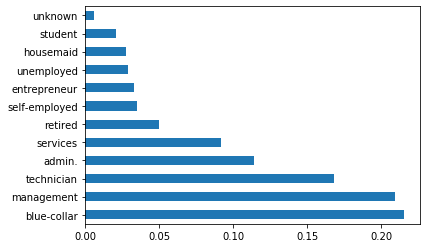

In [53]:
data.job.value_counts(normalize=True).plot.barh()
plt.show()

Categorical Ordered Univariate Analysis:
Ordered variables are those variables that have a natural rank of order. Some examples of categorical ordered variables from our dataset are:
Month: Jan, Feb, March……
Education: Primary, Secondary,……

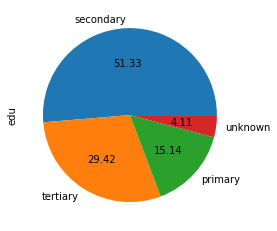

In [56]:
#calculate the percentage of each education category.
data.edu.value_counts(normalize=True)

#plot the pie chart of education categories
data.edu.value_counts(normalize=True).plot.pie(autopct='%1.2f')
plt.show()

# Bivariate Analysis


If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.

a) Numeric-Numeric Analysis:
Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.

Scatter Plot

Pair Plot

Correlation Matrix

Scatter Plot

Let’s take three columns ‘Balance’, ‘Age’ and ‘Salary’ from our dataset and see what we can infer by plotting to scatter plot between salary balance and age balance

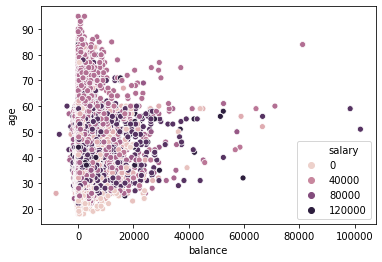

In [61]:
sns.scatterplot(data['balance'],data['age'],hue=data['salary'])

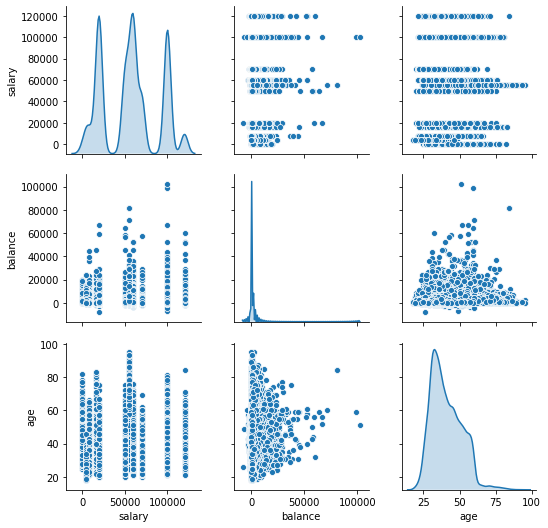

In [63]:
sns.pairplot(data = data, vars=['salary','balance','age'],diag_kind='kde')
plt.show()

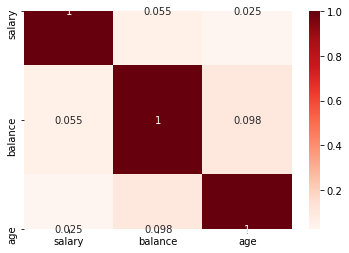

In [66]:
cor=data[['salary','balance','age']].corr()
sns.heatmap(cor,annot=True, cmap = 'Reds')

b) Numeric - Categorical Analysis
Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.

In [68]:
data.groupby('response').salary.mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

There is not much of a difference between the yes and no response based on the salary.

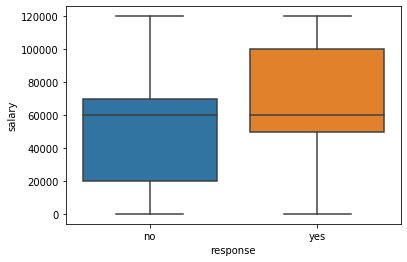

In [69]:
sns.boxplot(data.response, data.salary)
plt.show()

c) Categorical — Categorical Analysis
Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate

In [70]:
data['response_rate']=np.where(data['response']=='yes',1,0)

In [71]:
data['response_rate'].value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

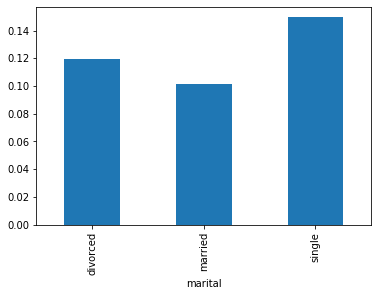

In [72]:

#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

 Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
Let’s see how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.

In [78]:
result=data.pivot_table(columns=['marital'],index=['edu'],values=['response_rate'])
print(result)

          response_rate                    
marital        divorced   married    single
edu                                        
primary        0.138852  0.075601  0.106808
secondary      0.103559  0.094650  0.129271
tertiary       0.137415  0.129835  0.183737
unknown        0.142012  0.122519  0.162879


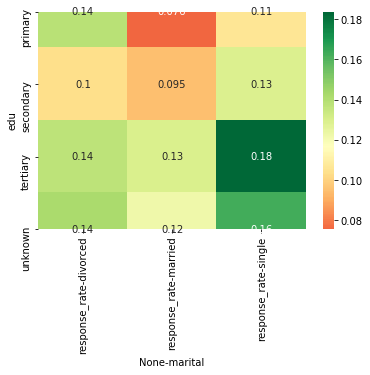

In [79]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()